In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("D:/Project/Wine_sales.csv")

In [3]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
## Cleaning up data
## Dropping NA values
df.dropna(how='any',inplace=True)

In [6]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [7]:
## Convert Month into Date time
df['Month']=pd.to_datetime(df['Month'])

In [8]:
df.head(15)

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
5,1964-06-01,3036.0
6,1964-07-01,2282.0
7,1964-08-01,2212.0
8,1964-09-01,2922.0
9,1964-10-01,4301.0


In [9]:
df.set_index('Month',inplace=True)

In [10]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [11]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Visualization of data

<AxesSubplot:xlabel='Month'>

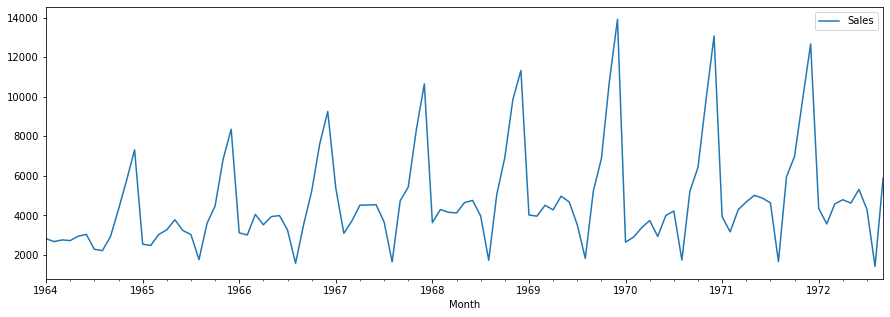

In [12]:
df.plot(figsize=(15,5))

In [13]:
### Test for stationary
from statsmodels.tsa.stattools import adfuller

In [14]:
test_result=adfuller(df['Sales'])

In [15]:
# H0 : It is  non-stationary.
# H1 : It is stationary.

def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of observations used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis(H0),reject the null hypothesis.Data is stationary")
    else:
            print("Weak evidence against the null hypothesis(H0).Data is non-stationary")

In [16]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
#Lags Used : 11
Number of observations used : 93
Weak evidence against the null hypothesis(H0).Data is non-stationary


 # Differencing

In [17]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [18]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [19]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [20]:
 ## Again performing Dickey-Fuller Test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of observations used : 92
Strong evidence against the null hypothesis(H0),reject the null hypothesis.Data is stationary


<AxesSubplot:xlabel='Month'>

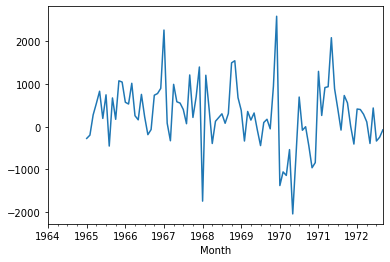

In [21]:
 df['Seasonal First Difference'].plot()

# Auto-Regressive Model

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

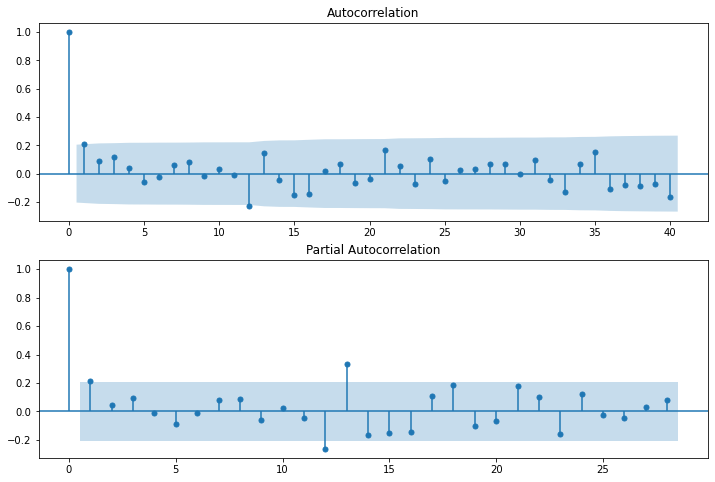

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=28,ax=ax2)
 

# Forecasting

In [24]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


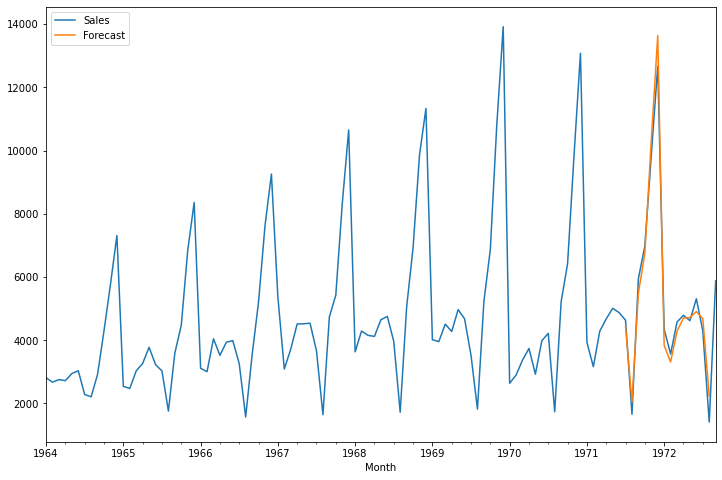

In [37]:
df['Forecast'] = results.predict(start=90,end=103,dynamic=True)
df[['Sales','Forecast']].plot(figsize=(12,8))
plt.savefig('wine.png',bbox_inches = 'tight')

# Accuracy

In [26]:
df1=df['Forecast']
df1.dropna(inplace=True)
df1

Month
1971-07-01     4437.323750
1971-08-01     2050.747346
1971-09-01     5493.376291
1971-10-01     6752.039282
1971-11-01    10327.298019
1971-12-01    13632.324131
1972-01-01     3832.960469
1972-02-01     3313.096694
1972-03-01     4285.475313
1972-04-01     4701.091773
1972-05-01     4717.509292
1972-06-01     4906.403178
1972-07-01     4685.435086
1972-08-01     2232.407879
Name: Forecast, dtype: float64

In [27]:
df2=df['Sales'].iloc[90:104]
df2

Month
1971-07-01     4633.0
1971-08-01     1659.0
1971-09-01     5951.0
1971-10-01     6981.0
1971-11-01     9851.0
1971-12-01    12670.0
1972-01-01     4348.0
1972-02-01     3564.0
1972-03-01     4577.0
1972-04-01     4788.0
1972-05-01     4618.0
1972-06-01     5312.0
1972-07-01     4298.0
1972-08-01     1413.0
Name: Sales, dtype: float64

In [28]:
from sklearn.metrics import r2_score

In [29]:
acc =r2_score(df2,df1)
accu= int(acc*100)
print("Accuracy:",accu,"%")

Accuracy: 97 %


# Future Sales

In [30]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [31]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [32]:
future_dates_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,Forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [33]:
future_df = pd.concat([df,future_dates_df])

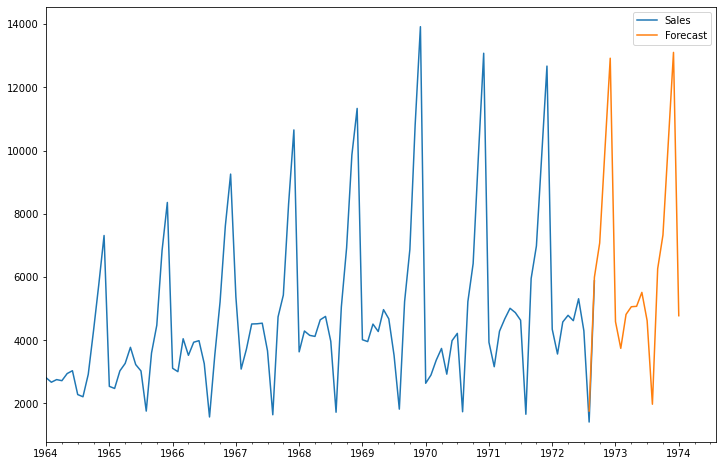

In [36]:
future_df['Forecast'] = results.predict(start = 103,end = 120,dynamic=True)
future_df[['Sales','Forecast']].plot(figsize=(12,8))
plt.savefig('wine2.png')
                                       

In [35]:
plt.savefig('wine1.png')

<Figure size 432x288 with 0 Axes>